<a href="https://colab.research.google.com/github/a-forty-two/HPE-DecJanFeb2021/blob/main/HPE_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CLASSIFICATION
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist

In [4]:
(trainimages,trainlabels), (testimages, testlabels) = fashion.load_data()
 

In [5]:
trainimages.shape

(60000, 28, 28)

In [6]:
len(trainlabels)

60000

In [7]:
len(testlabels)

10000

Ankle boot


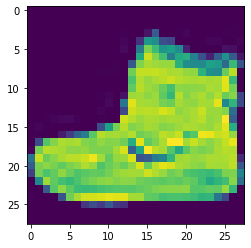

In [15]:
classes = {0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

x = 0
plt.imshow(trainimages[x])
print(classes[trainlabels[x]])

In [16]:
for i in range(10):
  print(classes[trainlabels[i]])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal


Pullover


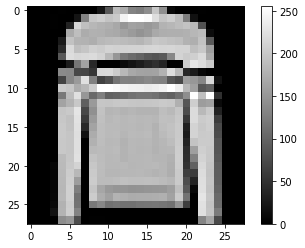

In [20]:

x = 5
plt.figure()
plt.imshow(trainimages[x], cmap='gray')
plt.colorbar()
plt.grid(False)
print(classes[trainlabels[x]])

Pullover


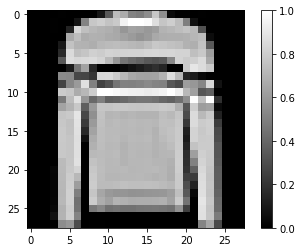

In [23]:
# Smallest-> 0, Largest-> 255
# Each pixel-> 1 byte-> 2^8-1
# Entire dataset/ largest_num -> 
# smallest/largest-> value>0
# largest/largest-> 1
trainx = trainimages /255.0
testx = testimages/255.0

x = 5
plt.figure()
plt.imshow(trainx[x], cmap='gray')
plt.colorbar()
plt.grid(False)
print(classes[trainlabels[x]])

In [24]:
# y = 1000*w1 + 10*w2 + 0.0003 *w3 + 0.04
# w -> 0..1 
# VERY Large numbers, away from smaller numbers

# 2 square = 4
# 0.2 square = 0.04 
# -0.2 square = 0.04 

In [25]:
hp1_m1_hidden1 = 128
l1_m1= keras.layers.Flatten(input_shape=(28,28))
l2_m1= keras.layers.Dense(hp1_m1_hidden1, activation=tf.nn.relu)
# y1=m1x+c1 ... y128 = m128x+c128
l3_m1= keras.layers.Dense(10, activation=tf.nn.softmax)
m1 = keras.Sequential([l1_m1,l2_m1,l3_m1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
hp1_m2_hidden1 = 64
l1_m2= keras.layers.Flatten(input_shape=(28,28))
l2_m2= keras.layers.Dense(hp1_m2_hidden1, activation=tf.nn.relu)
# y1=m1x+c1 ... y128 = m128x+c128
l3_m2= keras.layers.Dense(10, activation=tf.nn.softmax)
m2 = keras.Sequential([l1_m2,l2_m2,l3_m2])

In [28]:
hp1_m3_hidden1 = 64
hp2_m3_hidden2 = 128
l1_m3= keras.layers.Flatten(input_shape=(28,28))
l2_m3= keras.layers.Dense(hp1_m3_hidden1, activation=tf.nn.relu)
l3_m3= keras.layers.Dense(hp2_m3_hidden2, activation=tf.nn.relu)
l4_m3= keras.layers.Dense(10, activation=tf.nn.softmax)
m3 = keras.Sequential([l1_m3,l2_m3,l3_m3, l4_m3])

In [31]:
# x1*w1 + x2*w2 +b1 = y1 * w3 + y2 * w4 + y3 * w5+ b2
# Neural Networks
# 1) Look at the data-> try to build y=mx+c 
#. -> cost, time
# 2) REPEATATION -> timelines -> EPOCH (Hyperparameter)
# m1-> EPOCHS (100), m1-> EPOCHS (5)-> diff outputs!!!
# 3) What happens in each EPOCH
# -> Maximize my profits, Minimize my losses
# -> Optimization Fn (correction to reduce the loss)
#.        -> Adaptive Learning (adaptive learning rate)-> Adam
#         -> prop, 
# -> Loss Fn (calculation of how much mistake was made) 
# -> metrics-> measure of how Loss is calculated [accuracy]


m1.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy', 
           metrics=['accuracy'])
m2.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy', 
           metrics=['accuracy'])
m3.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy', 
           metrics=['accuracy'])

In [35]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [36]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [37]:
m3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Resuming at 7:45 
HP_epochs = 5
history1 = m1.fit(trainx, trainlabels, epochs=HP_epochs)
history2 = m2.fit(trainx, trainlabels, epochs=HP_epochs)
history3 = m3.fit(trainx, trainlabels, epochs=HP_epochs)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5012 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3778 - acc: 0.8632
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3368 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3131 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2967 - acc: 0.8898
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5161 - acc: 0.8191
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3924 - acc: 0.8593
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3539 - acc: 0.8713
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3299 - acc: 0.8802
Epoch 5/5
60000/60000 [======================

In [39]:
history1.history

{'acc': [0.8239167, 0.8631667, 0.87733334, 0.88476664, 0.8898],
 'loss': [0.5011600944201151,
  0.3778417750736078,
  0.33683658874034883,
  0.3130897683123747,
  0.29671518041491507]}

In [40]:
testloss1, testacc1 = m1.evaluate(testx, testlabels)
testloss2, testacc2 = m2.evaluate(testx, testlabels)
testloss3, testacc3 = m3.evaluate(testx, testlabels)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3649 - acc: 0.8649


In [43]:
predictions1 = m1.predict(testx)
predictions2 = m2.predict(testx)
predictions3 = m3.predict(testx)

In [45]:
predictions1[0]

array([3.8866094e-07, 5.9875411e-08, 1.3793735e-07, 2.0879646e-07,
       3.8256380e-07, 1.8256545e-02, 7.7140697e-07, 3.3833854e-02,
       4.3838871e-05, 9.4786382e-01], dtype=float32)

In [51]:
for x in range(50):  
  p1 =classes[np.argmax(predictions1[x])]
  p2 =classes[np.argmax(predictions2[x])]
  p3 =classes[np.argmax(predictions3[x])]
  actual =classes[testlabels[x]]
  didErrorHappen = False

  if(p1 != actual):
    print('Model 1 Says= ' + classes[np.argmax(predictions1[x])])
    didErrorHappen = True
  if(p2 != actual):
    print('Model 2 Says= ' + classes[np.argmax(predictions2[x])])
    didErrorHappen = True
  if(p3 != actual):
    print('Model 3 Says= ' + classes[np.argmax(predictions3[x])])
    didErrorHappen = True
  if(didErrorHappen):
    print('Actual= ' + classes[testlabels[x]])
    #plt.figure()
    #plt.imshow(testx[x], cmap='gray')
    #plt.colorbar()
    #plt.grid(False)
    

Model 1 Says= Sandal
Model 2 Says= Sandal
Model 3 Says= Sandal
Actual= Sneaker
Model 1 Says= Pullover
Model 2 Says= Pullover
Actual= Coat
Model 1 Says= Sandal
Model 2 Says= Sandal
Model 3 Says= Sandal
Actual= Ankle boot
Model 1 Says= Pullover
Model 2 Says= Pullover
Model 3 Says= Pullover
Actual= Coat
Model 1 Says= Dress
Actual= T-shirt/top
Model 1 Says= T-shirt/top
Model 2 Says= T-shirt/top
Actual= Shirt
Model 2 Says= Shirt
Model 3 Says= Shirt
Actual= Dress
Model 2 Says= Ankle boot
Actual= Sneaker
Model 3 Says= Shirt
Actual= Pullover
Model 1 Says= Shirt
Model 2 Says= Shirt
Model 3 Says= Shirt
Actual= Pullover
